In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
realdata=np.fromfile("200ms/200ms_500MHz.bin",'u2')

In [3]:
N=len(realdata)
Nchunks=100
ChunkSize=int(N/Nchunks)
subdata=[]
meanz=[{} for k in range(Nchunks)]
standev=[{} for p in range(Nchunks)]
#realdata[0:100]
for i in range (Nchunks):
    subdata.append(realdata[i*ChunkSize:(i+1)*ChunkSize])
    meanz[i]=np.mean(subdata[i])
    standev[i]=np.sqrt(subdata[i].var())
#print(subdata)    

In [4]:
mean=subdata[1].mean()
rms=np.sqrt(subdata[1].var())
#Ns=4096
#Na=131835
#print ('mean=',mean)
#print ('standard deviation=',rms)
#print ('total length=',N, Na*Ns)
dt=1.0/2.7e9 #2.5 GSample/s
nuX=500.69158364*1e6

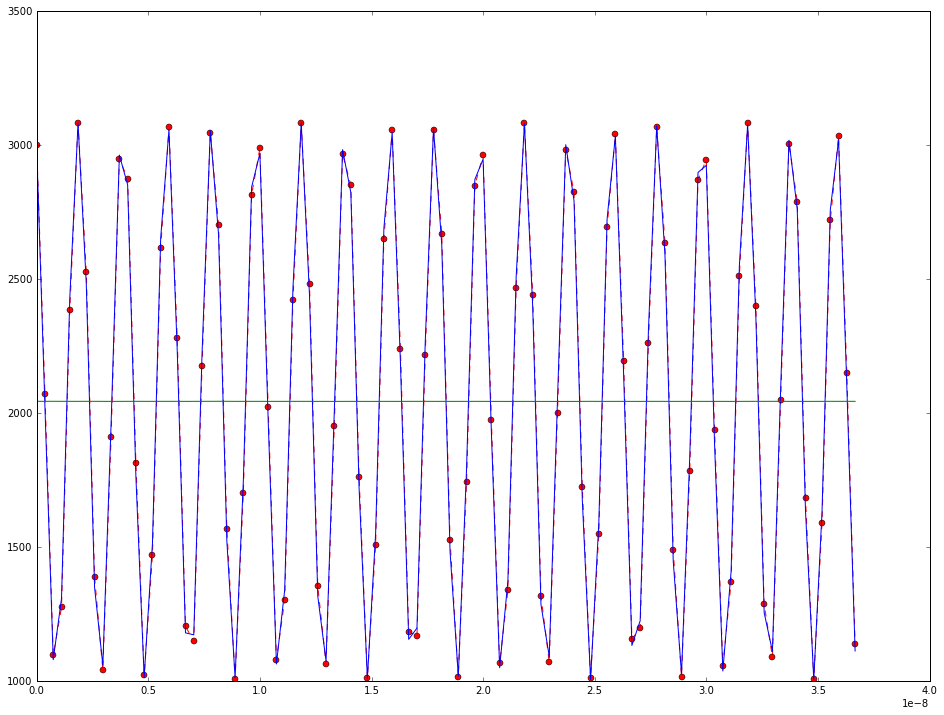

In [5]:
# first let's check weird ordering, by taking firt 100 samples
figure (figsize=(16,12))
t=arange(100)*dt #chunk size
y=realdata[:100]
len(t), len(y)
plot(t,y,'ro--')
plot(t,mean+np.sqrt(2)*rms*(sin(2+nuX*t*np.pi*2)))
plot(t,meanz)
plt.savefig("Constant.pdf")


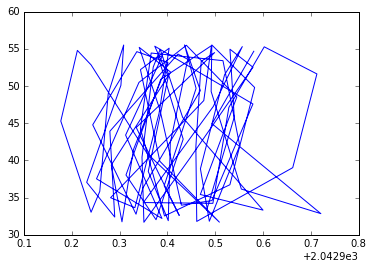

In [8]:
sr=np.sqrt(mean+np.sqrt(2)*rms*(sin(2+nuX*t*np.pi*2)))
plot(meanz,sr)

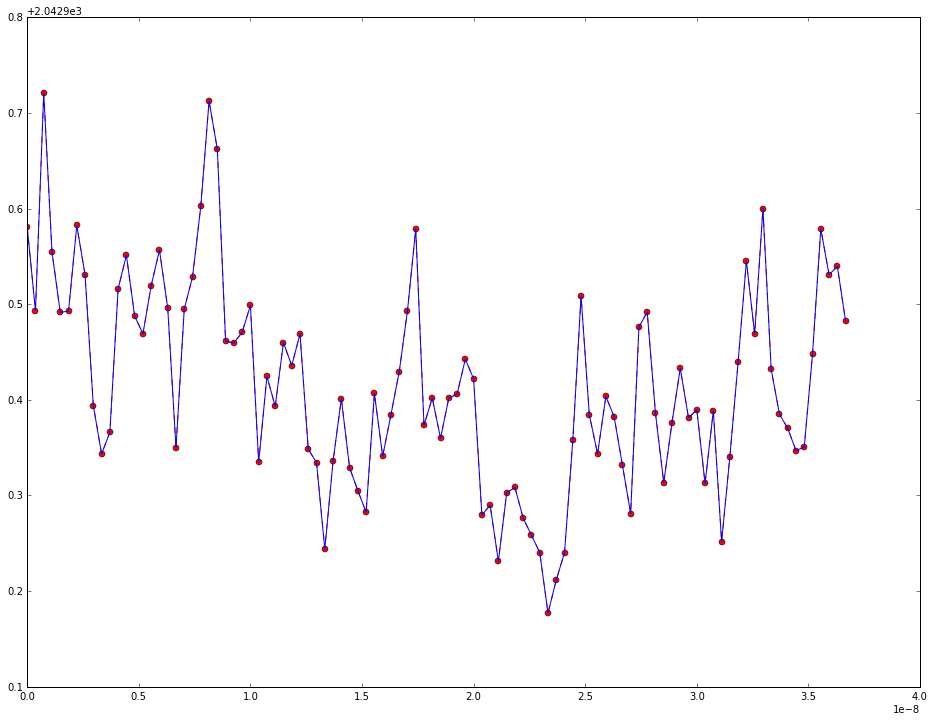

In [9]:
figure (figsize=(16,12))
t=arange(Nchunks)*dt
#y=realdata[meanz]
y=meanz
plot(t,y,'ro--')
plot(t,meanz)

In [28]:
fd=fft.rfft(realdata)

In [29]:
def plotlocal(nu1,nu2):
    dnu=1.0/(dt*N)
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    figure(figsize=(16,12))
    plot(far/1e6,fdz)
    xlabel('f[MHz]')
    ylabel('power')
    semilogy()
    return far,fdz

ValueError: x and y must have same first dimension

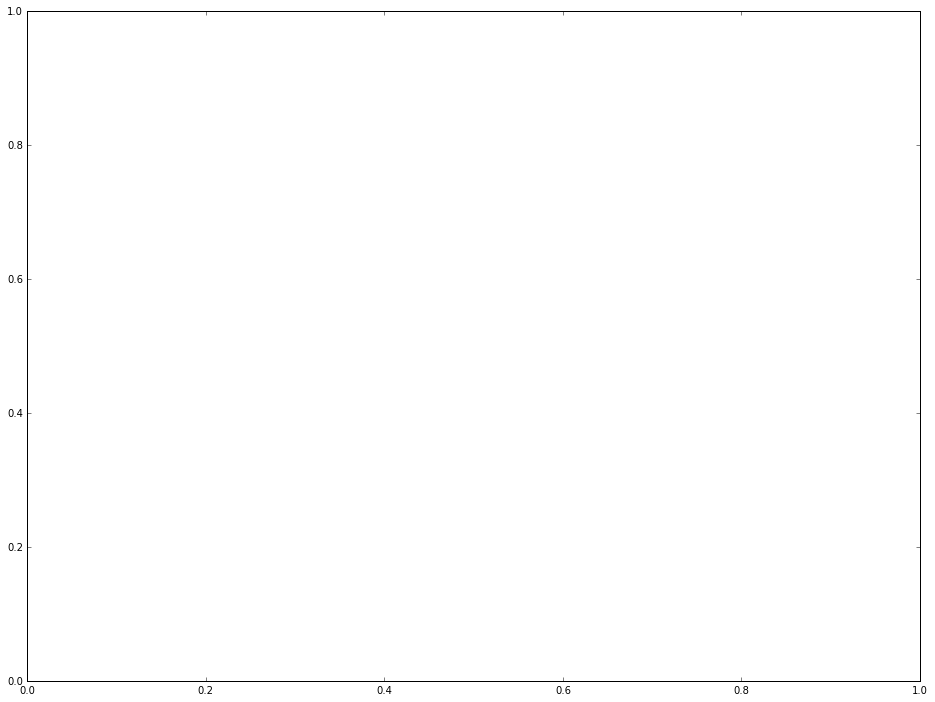

In [30]:
far,fdz=plotlocal(500.6e6,500.8e6)

In [86]:
nuM=far[fdz.argmax()]
dnu=1/(N*dt)
print nuM/1e6, "+/-", dnu/1e6
print "ratio",nuM/nuX-1

500.69254048 +/- 5.00003555581e-06
ratio 1.91103729152e-06


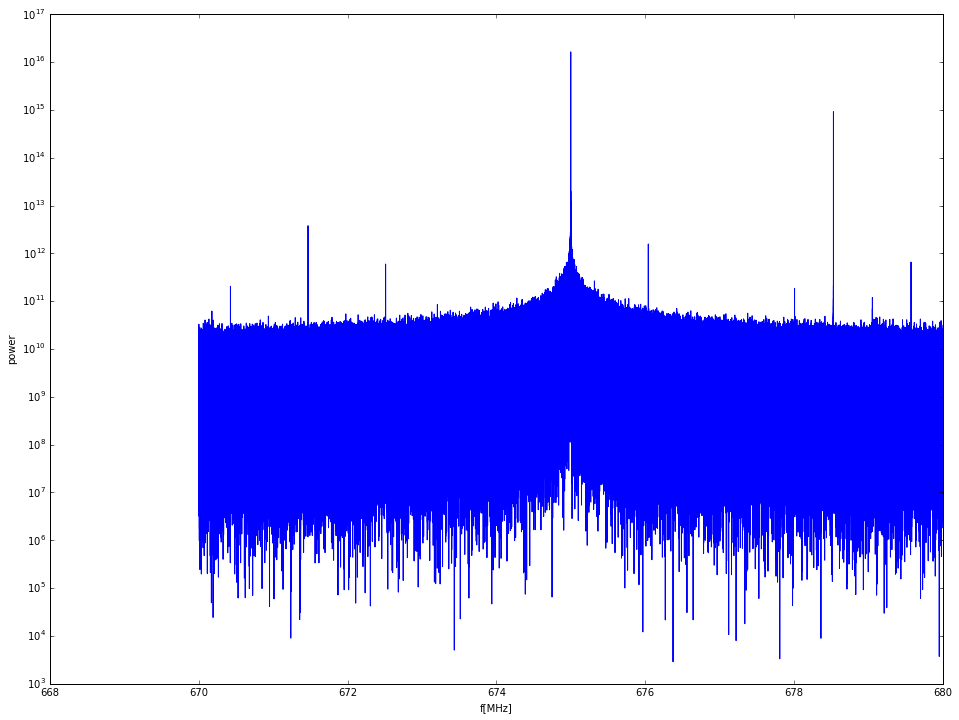

In [87]:
## Do we still see the 6.75MHz
far,fdz=plotlocal(670e6,680e6)


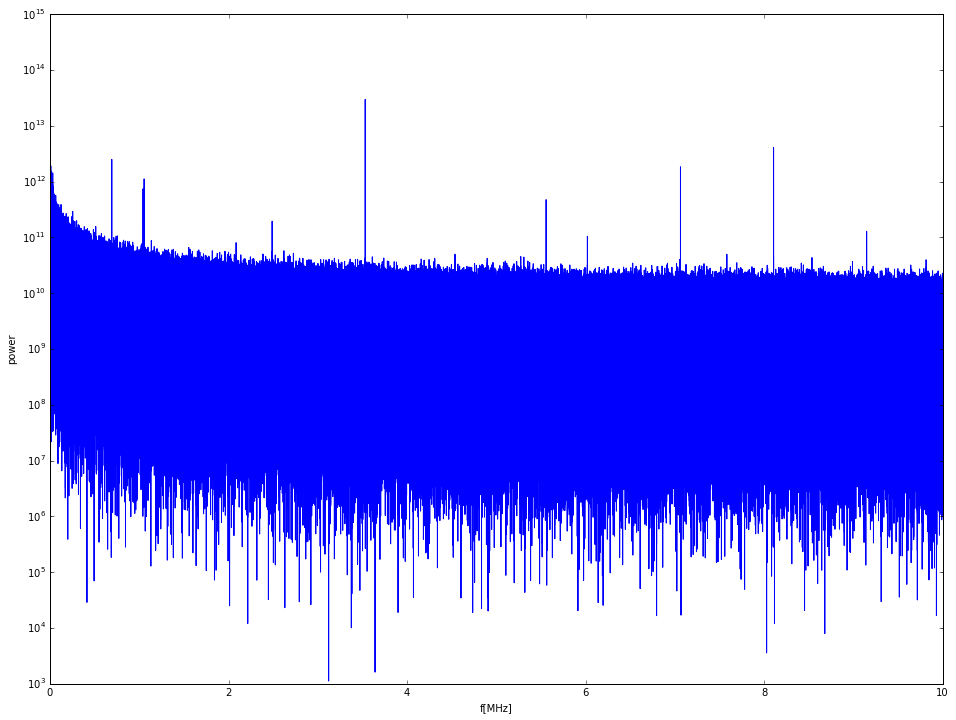

In [88]:
## What about 1/f?
far,fdz=plotlocal(10,10e6)

In [89]:
Navg=250000
dnua=1.0/(dt*N)*Navg
i=1
res=[]
while i<N/2:
    tmp=fd[i:i+Navg]
    res.append(abs(tmp*tmp).mean())
    i+=Navg
pow=np.array(res)
freq=arange(len(res))*dnua

1080


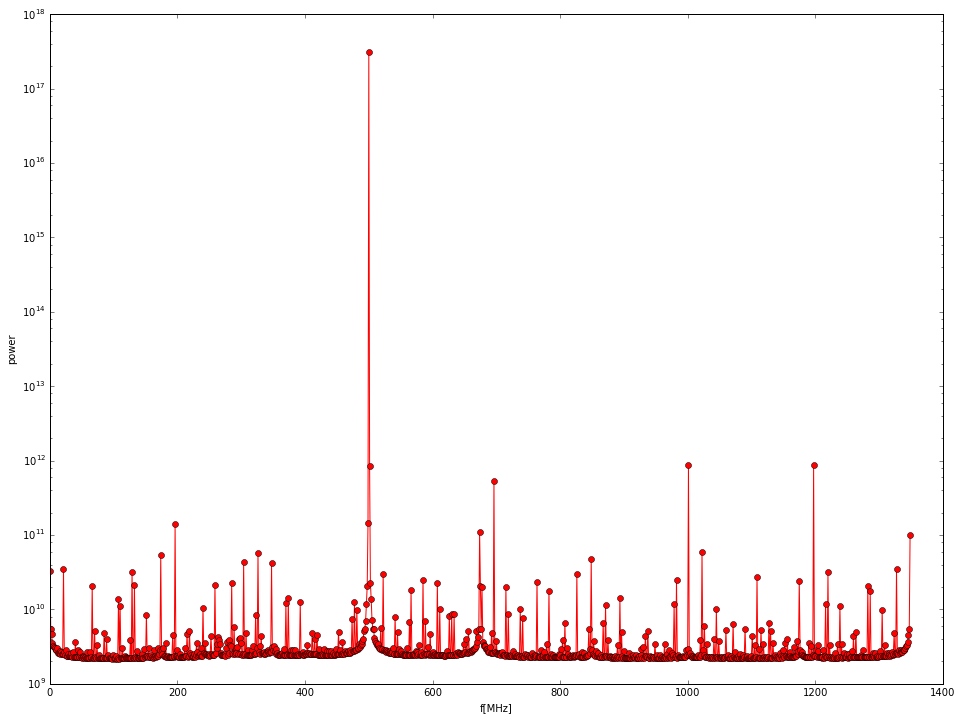

In [90]:
figure(figsize=(16,12))
plot(freq/1e6,pow,'ro-')
xlabel("f[MHz]")
ylabel("power")
semilogy()
#xlim(990,1050)
print len(freq)

697229833.079


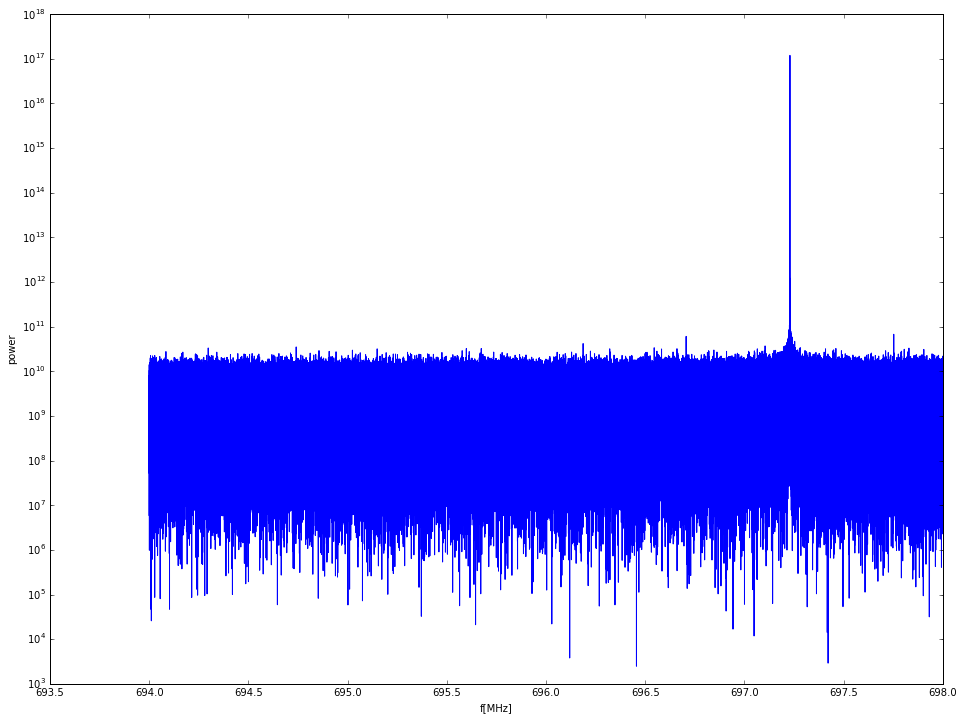

In [91]:
far,fdz=plotlocal(694e6,698e6)
print far[fdz.argmax()]

1001385080.96


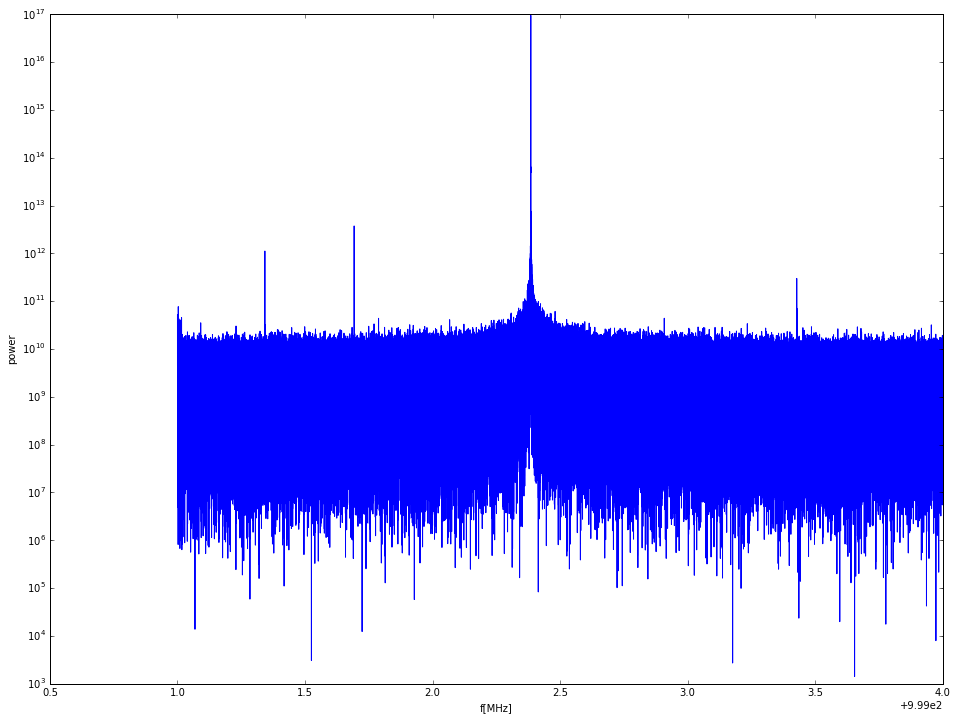

In [92]:
far,fdz=plotlocal(1000e6,1003e6)
print far[fdz.argmax()]